# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study_df["Mouse ID"].value_counts()

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
g989_df = mouse_study_df.loc[(mouse_study_df["Mouse ID"]=="g989"),:]
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"]
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation_volume = clean_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_volume = clean_mouse_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, 
                                "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Std. Dev.":
                                standard_deviation_volume, "Tumor Volume Std. Err": sem_volume})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg = clean_mouse_study_df.groupby(["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].agg(['mean','median',
                                                                                                           'var','std','sem'])

drug_regimen_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

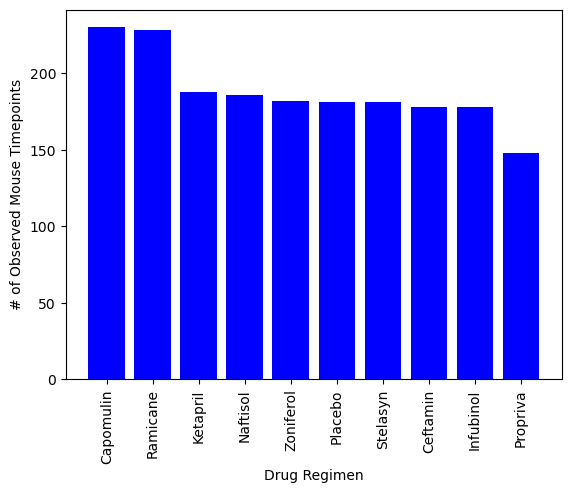

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_list = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
#print(drug_regimen_list)
count_timepoints = clean_mouse_study_df.groupby(["Drug Regimen"])["Timepoint"].count()
count_timepoints = count_timepoints.sort_values(ascending=False)
plt.bar(drug_regimen_list, count_timepoints, color="blue")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

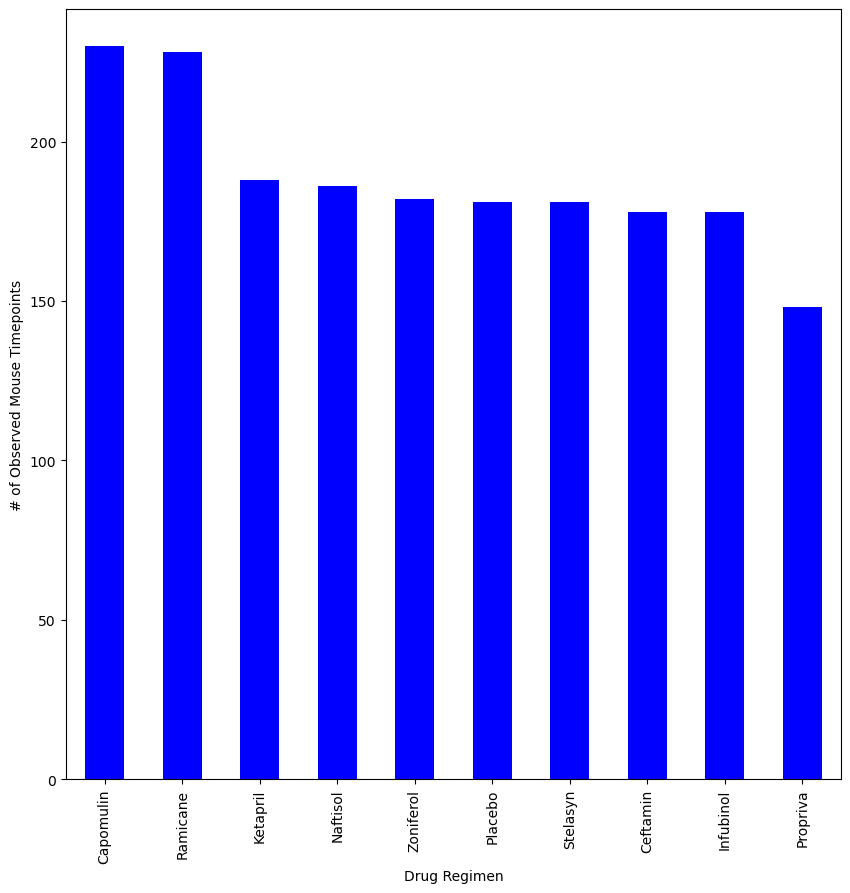

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_timepoints.plot(kind="bar", figsize=(10,10), xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", color="blue")


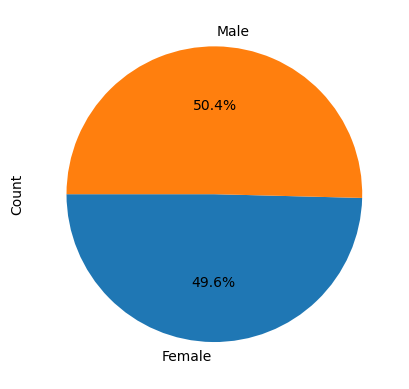

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_gender=clean_mouse_study_df.groupby(["Sex"])["Mouse ID"].nunique()
labels = ["Female","Male"]

# Get the unique mice with their gender
plt.pie(mice_gender, labels=labels,autopct="%1.1f%%", startangle=180)
plt.ylabel("Count")
plt.show()

# Make the pie chart


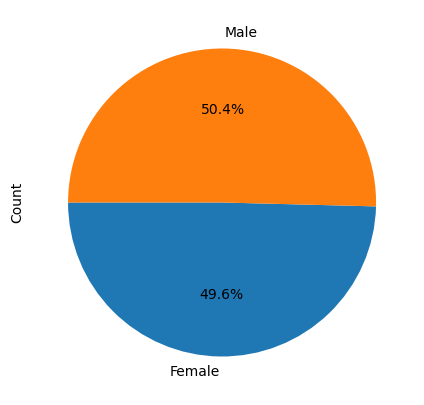

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
mice_gender.plot(kind="pie",figsize=(5,5), ylabel="Count",autopct="%1.1f%%",startangle=180)
# Get the unique mice with their gender
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [14]:
#tumor_volumes = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"]=="Capomulin")|(clean_mouse_study_df["Drug Regimen"]=="Ramicane")
#                                               |(clean_mouse_study_df["Drug Regimen"]=="Infubinol")|(clean_mouse_study_df["Drug Regimen"]=="Ceftamin")
#                                               ,:]


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_study_df.groupby(["Mouse ID"],as_index=False).max()
greatest_timepoint= greatest_timepoint[["Mouse ID","Timepoint"]]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volumes = pd.merge(greatest_timepoint,clean_mouse_study_df, on="Mouse ID", how="left")
final_tumor_volumes = tumor_volumes.drop_duplicates(subset=["Mouse ID", "Timepoint_x"], keep='last')
final_tumor_volumes = final_tumor_volumes.drop("Timepoint_y", axis=1)
final_tumor_volumes = final_tumor_volumes.rename(columns={"Timepoint_x":"Timepoint"})
final_tumor_volumes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,70.717621,4,Placebo,Female,17,29
39,a275,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1839,z435,10,48.710661,0,Propriva,Female,12,26
1849,z578,45,30.638696,0,Ramicane,Male,11,16
1859,z581,45,62.754451,3,Infubinol,Female,24,25
1869,z795,45,65.741070,3,Naftisol,Female,13,29


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
final_tv_by_drug = final_tumor_volumes.loc[(final_tumor_volumes["Drug Regimen"]=="Capomulin")|(final_tumor_volumes["Drug Regimen"]=="Ramicane")
                                               |(final_tumor_volumes["Drug Regimen"]=="Infubinol")|(final_tumor_volumes["Drug Regimen"]=="Ceftamin")
                                               ,:]

capomulin = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Capomulin"),:]
capomulin = capomulin["Tumor Volume (mm3)"]
ramicane = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Ramicane"),:]
ramicane = ramicane["Tumor Volume (mm3)"]
infubinol = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Infubinol"),:]
infubinol = infubinol["Tumor Volume (mm3)"]
ceftamin = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Ceftamin"),:]
ceftamin = ceftamin["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_outliers = []
ramicane_outliers = []
infubinol_outliers = []
ceftamin_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin IQR
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

#Ramiane IQR
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

#Infubinol IQR
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)


#Ceftamin IQR
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset

    # Determine outliers using upper and lower bounds

capomulin_outliers = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Capomulin") & 
                                          ((final_tv_by_drug["Tumor Volume (mm3)"]<cap_lower_bound) | 
                                           (final_tv_by_drug["Tumor Volume (mm3)"]>cap_upper_bound)),:]

ramicane_outliers = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Ramicane") & 
                                        ((final_tv_by_drug["Tumor Volume (mm3)"]<ram_lower_bound) | 
                                         (final_tv_by_drug["Tumor Volume (mm3)"]>ram_upper_bound)),:]

infubinol_outliers = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Infubinol") & 
                                         ((final_tv_by_drug["Tumor Volume (mm3)"]<inf_lower_bound) | 
                                          (final_tv_by_drug["Tumor Volume (mm3)"]>inf_upper_bound)),:]

ceftamin_outliers = final_tv_by_drug.loc[(final_tv_by_drug["Drug Regimen"]=="Ceftamin") & 
                                        ((final_tv_by_drug["Tumor Volume (mm3)"]<cef_lower_bound) | 
                                         (final_tv_by_drug["Tumor Volume (mm3)"]>cef_upper_bound)),:]

print("Capomulin's potential outliers: ", capomulin_outliers["Mouse ID"].values , capomulin_outliers["Tumor Volume (mm3)"].values)
print("Ramicane's potential outliers: ", ramicane_outliers["Mouse ID"].values, ramicane_outliers["Tumor Volume (mm3)"].values)
print("Infubinol's potential outliers: ", infubinol_outliers["Mouse ID"].values, infubinol_outliers["Tumor Volume (mm3)"].values)
print("Ceftamin's potential outliers: ", ceftamin_outliers["Mouse ID"].values, ceftamin_outliers["Tumor Volume (mm3)"].values)


Capomulin's potential outliers:  [] []
Ramicane's potential outliers:  [] []
Infubinol's potential outliers:  ['c326'] [36.3213458]
Ceftamin's potential outliers:  [] []


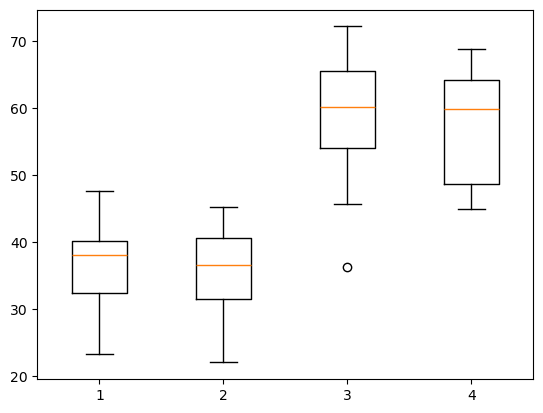

In [188]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin])
plt.show()

## Line and Scatter Plots

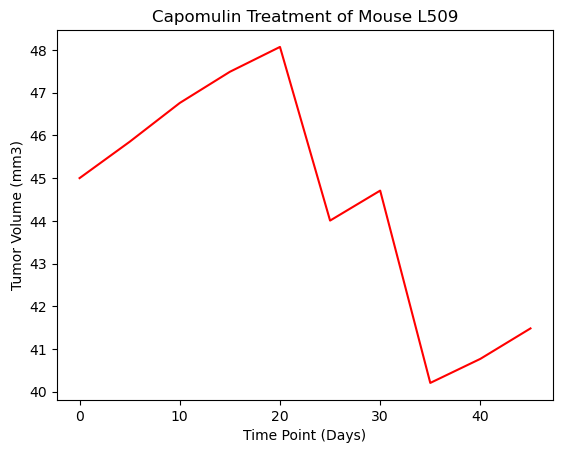

In [131]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatments_l509 = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"]=="Capomulin")&(clean_mouse_study_df["Mouse ID"]=="l509"),:]
plt.plot(capomulin_treatments_l509["Timepoint"], capomulin_treatments_l509["Tumor Volume (mm3)"], color="red")
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse L509")
plt.show()


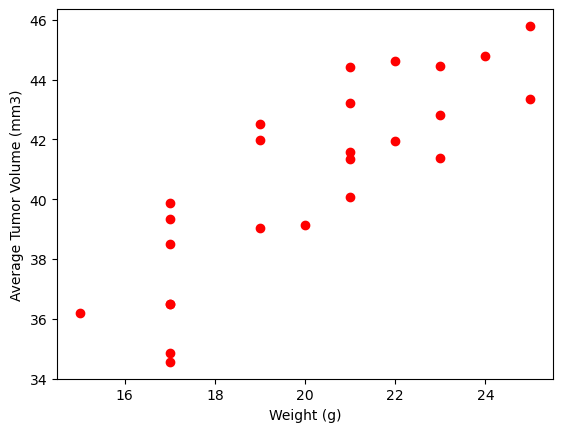

In [58]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treatments = clean_mouse_study_df.loc[(clean_mouse_study_df["Drug Regimen"]=="Capomulin"),:]
#capomulin_treatments
tumor_volume_capomulin = capomulin_treatments.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_treatments.groupby(["Mouse ID"])["Weight (g)"].unique()
plt.scatter(mouse_weight,tumor_volume_capomulin, color="red",marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

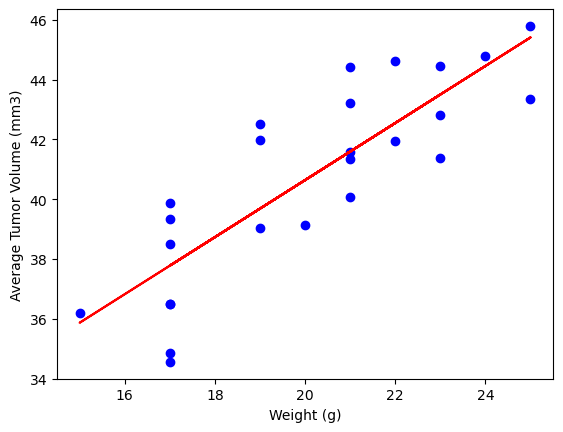

The correlation between both mouse weight and average tumor volume is [0.84]


In [62]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
correlation = st.pearsonr(mouse_weight,tumor_volume_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight.astype(float), tumor_volume_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumor_volume_capomulin, color="blue",marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
print(f"The correlation between both mouse weight and average tumor volume is {np.round(correlation[0],2)}")